<a href="https://colab.research.google.com/github/invokeryu/Reconmmendation-System/blob/main/homework01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
data = pd.read_csv('./drive/MyDrive/推荐系统前沿作业/u.data',sep='\t',header=None) # 没有列名
# 去除最后一列
data = data.iloc[:,0:3]

In [ ]:
data

,0,1,2
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
...,...,...,...
99995,880,476,3
99996,716,204,5
99997,276,1090,1
99998,13,225,2


In [ ]:
data.columns = ['u_id','m_id','rating']

In [ ]:
data = data.values

In [ ]:
N = np.max(data[:,0])+1 # 用户数
M = np.max(data[:,1])+1 # 电影数
# 划分训练集
train_set,test_set = train_test_split(data,train_size=0.8)
# 定义训练参数
K = 10 # 潜因子个数
max_iter = 100 # 100次迭代
learning_rate = 0.005
# 定义正则项系数lambda
lambda_regular = 0.1

In [ ]:
# 初始化U,V矩阵
U = np.random.normal(0,0.1,(N,K))
V = np.random.normal(0,0.1,(M,K))

In [ ]:
## 进行训练
train_loss_all = []
val_loss_all = []
for epoch in range(max_iter):
  train_loss=  0.0
  val_loss = 0.0 
  val_mae=0.0
  for data in train_set:
    u_id = data[0] # 用户id
    m_id  = data[1] # 电影id
    r = data[2] # 评分
    # print(u_id,m_id,r)
    # 获取模型的输出
    p = U[u_id]
    q = V[m_id]
    output = np.dot(p,q.T)
    # 误差
    error = r-output
    # 优化的目标函数
    los = 0.5*(error**2 + lambda_regular*(np.square(p).sum() + np.square(q).sum()))
    # 计算梯度，更新U,V
    U[u_id] = p + learning_rate*(error*q - lambda_regular*p)
    V[m_id] = q + learning_rate*(error*p - lambda_regular*q)
    train_loss += los
  train_loss_all.append(train_loss)
  if epoch % 10 ==0:
    print(epoch,train_loss)
    
  for data in test_set:
    u_id = data[0]
    m_id = data[1]
    r = data[2]
    output = np.dot(U[u_id],V[m_id])
    # 误差
    error = r-output
    # 优化的目标函数
    los = 0.5*(error**2 + lambda_regular*(np.square(p).sum() + np.square(q).sum()))
    val_loss += los
  val_loss_all.append(val_loss)
  if epoch % 10 == 0:
    print(epoch,val_loss)
    

0 550416.3525283333
0 135438.5696759103
10 65463.84007773531
10 19052.76159677484
20 62780.184939298306
20 18448.036433531688
30 61508.54405490894
30 18219.736308122276
40 60661.10241315535
40 18105.112794767952
50 59991.2348303647
50 18056.065479089328
60 59442.73507558279
60 18056.9326317206
70 59011.31360688635
70 18092.904547487815
80 58682.120515659015
80 18149.269827630113
90 58433.77427283391
90 18215.42972922449


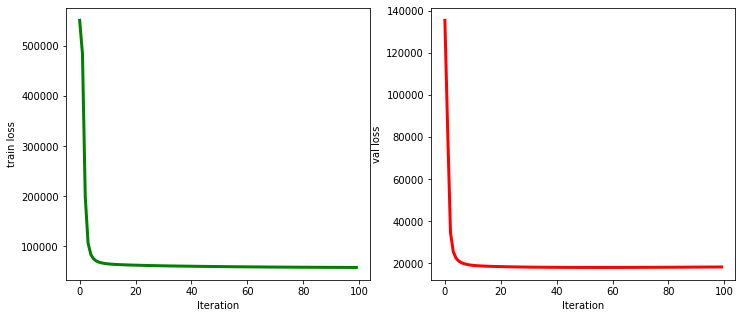

In [ ]:
import matplotlib.pyplot as plt
x = range(len(train_loss_all))
x = np.array(x)
plt.figure(figsize = (12,5))
plt.subplot(1,2,1)
plt.plot(x,train_loss_all,'g',linewidth=3)
plt.xlabel('Iteration')
plt.ylabel('train loss')
plt.subplot(1,2,2)
x2 = range(len(val_loss_all))
x2 = np.array(x2)
plt.plot(x2,val_loss_all,'r',linewidth = 3)
plt.xlabel('Iteration')
plt.ylabel('val loss')
plt.show()


In [ ]:
W